<a href="https://colab.research.google.com/github/udfds/DataLab/blob/master/exercises/time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install libs

In [0]:
!pip install statsmodels
!pip install matplotlib
!pip install seaborn
!pip install arch

     |████████████████████████████████| 727kB 3.4MB/s 


## Import libs

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pylab
import seaborn as sns

import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts

from statsmodels.tsa.seasonal import seasonal_decompose
from google.colab import files
from google.colab import drive

sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load datataframe

In [0]:
df_draft = pd.read_csv('Index2018.csv')

df_timeseries = df_draft.copy()

df_timeseries.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


## Exploring the Data

In [0]:
# Aboute the data frame
# spx    = S&P 500  (USA)
# dax    = DAX 30  (German)
# ftse   = FTSE 100  (UK)
# nikkei = NIKKEI 225  (Japan)

In [0]:
df_timeseries.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [0]:
df_timeseries.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Plotting the Data

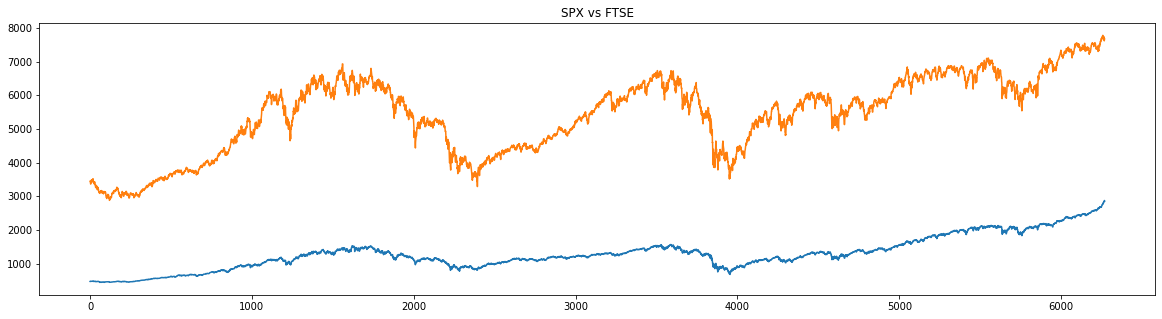

In [0]:
df_timeseries.spx.plot(figsize=(20, 5))
df_timeseries.ftse.plot(figsize=(20, 5))

plt.title('SPX vs FTSE');

## The QQ Plot

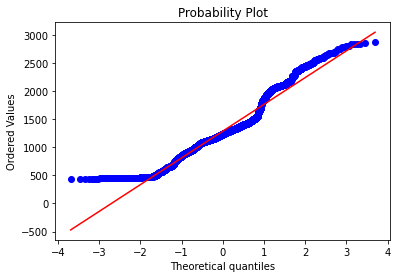

In [0]:
scipy.stats.probplot(df_timeseries.spx, plot = pylab)
pylab.show()

## Convert Text in Date and setting the Index

In [0]:
df_timeseries.date = pd.to_datetime(df_timeseries.date, dayfirst=True)

df_timeseries.set_index('date', inplace=True)

df_timeseries.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Setting the frequency

In [0]:
# Business days = 'b'
df_timeseries = df_timeseries.asfreq('b')
df_timeseries.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Handling Missing values (after use frequency)

In [0]:
df_timeseries.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [0]:
df_timeseries.spx = df_timeseries.spx.fillna(method='ffill')
df_timeseries.ftse = df_timeseries.ftse.fillna(method='bfill')
df_timeseries.dax = df_timeseries.dax.fillna(value=df_timeseries.dax.mean())
df_timeseries.nikkei = df_timeseries.nikkei.fillna(method='ffill')

df_timeseries.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Simplifying the Dataset

In [0]:
df_timeseries['market_value'] = df_timeseries.spx
del  df_timeseries['spx'], df_timeseries['dax'], df_timeseries['ftse'], df_timeseries['nikkei']

df_timeseries.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


## Splitting up the Data

In [0]:
size = int(len(df_timeseries)*0.8)

df_training = df_timeseries.iloc[:size]
df_test = df_timeseries.iloc[size:]

## White Noise

In [0]:
white_noise = np.random.normal(loc=df_training.market_value.mean(), scale=df_training.market_value.std(), size=len(df_training))
df_training['white_noise'] = white_noise

df_training.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,market_value,white_noise
count,5021.000000,5021.000000
mean,1091.651926,1096.198652
std,292.559287,294.289857
min,438.920000,42.395837
25%,914.620000,897.659858
50%,1144.650000,1096.069216
75%,1316.280729,1290.498259
max,1570.252238,2267.447123


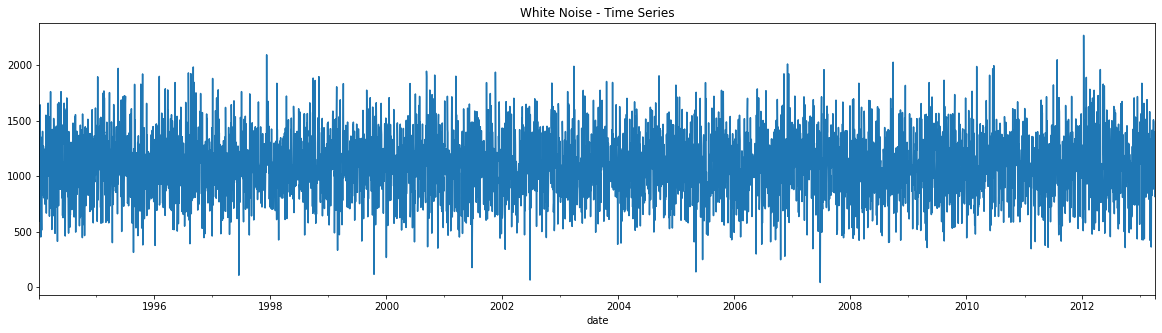

In [0]:
df_training.white_noise.plot(title='White Noise - Time Series', figsize=(20, 5));

(0.0, 2300.0)

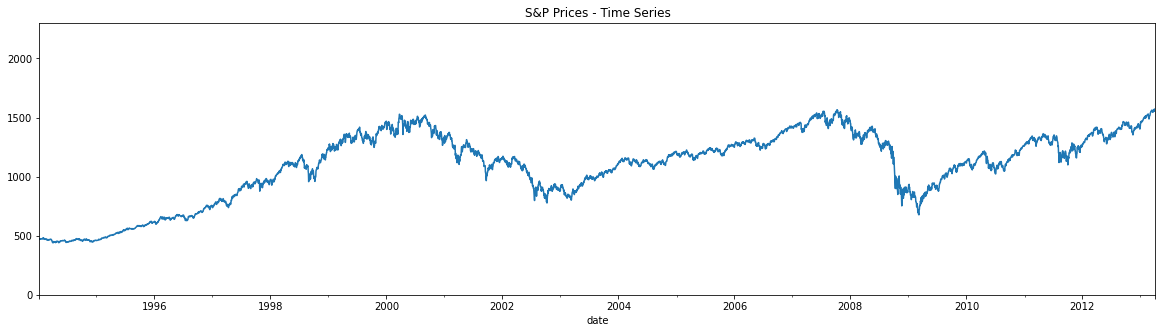

In [0]:
df_training.market_value.plot(title='S&P Prices - Time Series', figsize=(20, 5));
plt.ylim(0, 2300)

## Random Walks

In [0]:
df_random_walks = pd.read_csv('RandWalk.csv')
df_random_walks.date = pd.to_datetime(df_random_walks.date, dayfirst=True)

df_random_walks.set_index('date', inplace=True)
df_random_walks = df_random_walks.asfreq('b')

df_random_walks.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [0]:
df_training['random_walk'] = df_random_walks.price

df_training.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,market_value,white_noise,random_walk
date,,,
1994-01-07,469.90,961.146633,1122.139662
1994-01-10,475.27,1363.765436,1080.347860
1994-01-11,474.13,592.936904,1082.095245
1994-01-12,474.17,1641.434505,1083.639265
1994-01-13,472.47,1031.918148,1067.146255


Text(0.5, 1.0, 'Random Walk vs S&P')

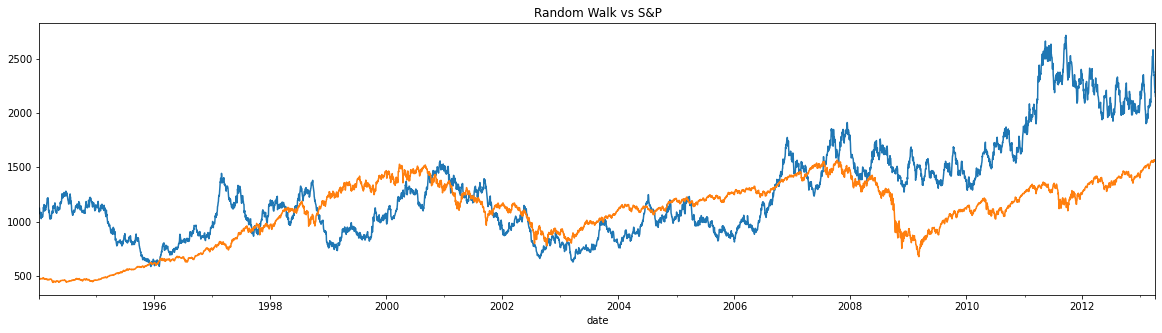

In [0]:
df_training.random_walk.plot(figsize=(20,5));
df_training.market_value.plot(figsize=(20,5));

plt.title('Random Walk vs S&P')

## Stattionaryity

In [0]:
sts.adfuller(df_training.market_value)

(-1.736984745235244,
 0.41216456967706194,
 18,
 5002,
 {'1%': -3.431658008603046,
  '10%': -2.567077669247375,
  '5%': -2.862117998412982},
 39904.880607487445)

In [0]:
sts.adfuller(df_training.white_noise)

(-72.46871790784982,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '10%': -2.5670765656497516,
  '5%': -2.8621159253018247},
 70865.61887355418)

In [0]:
sts.adfuller(df_training.random_walk)

(-1.3286073927689708,
 0.6159849181617388,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '10%': -2.567078038881065,
  '5%': -2.8621186927706463},
 46299.333497595144)

## Seasonality

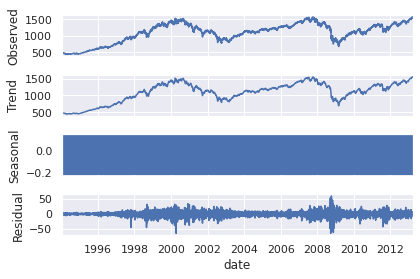

In [0]:
decompose_additive = seasonal_decompose(df_training.market_value, model='additive')
decompose_additive.plot();

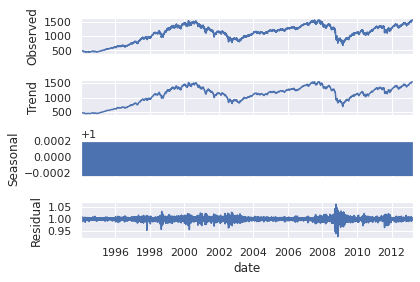

In [0]:
decompose_multiplicative = seasonal_decompose(df_training.market_value, model='multiplicative')
decompose_multiplicative.plot();

## Correlation - ACF (Autocorrelation Function)

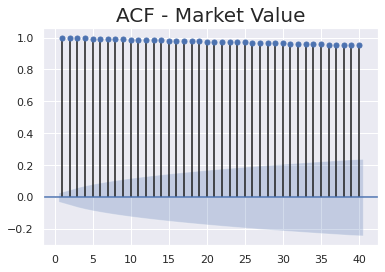

In [37]:
sgt.plot_acf(df_training.market_value, unbiased=True, zero=False, lags=40)
plt.title('ACF - Market Value', size=20);

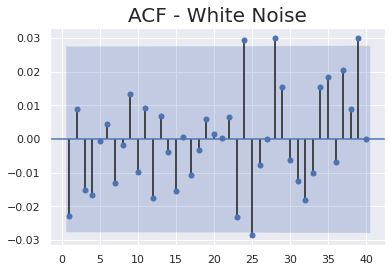

In [38]:
sgt.plot_acf(df_training.white_noise, unbiased=True, zero=False, lags=40)
plt.title('ACF - White Noise', size=20);

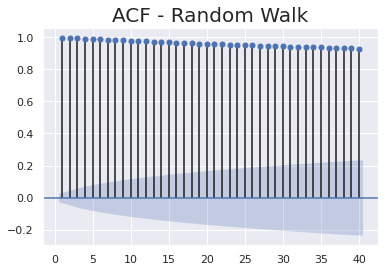

In [39]:
sgt.plot_acf(df_training.random_walk, unbiased=True, zero=False, lags=40)
plt.title('ACF - Random Walk', size=20);

## Correlation - PACF (Parcial Autocorrelation Function)

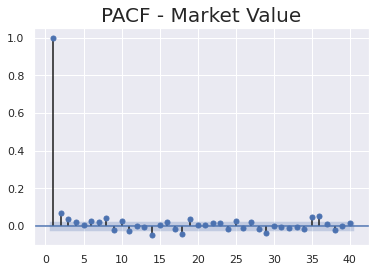

In [40]:
sgt.plot_pacf(df_training.market_value, lags=40, alpha=0.05, zero=False, method=('ols'))
plt.title('PACF - Market Value', size=20);

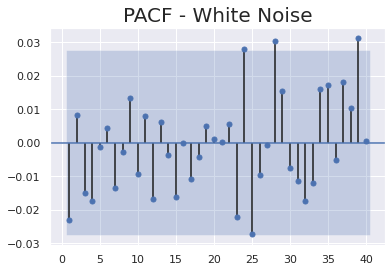

In [41]:
sgt.plot_pacf(df_training.white_noise, lags=40, alpha=0.05, zero=False, method=('ols'))
plt.title('PACF - White Noise', size=20);

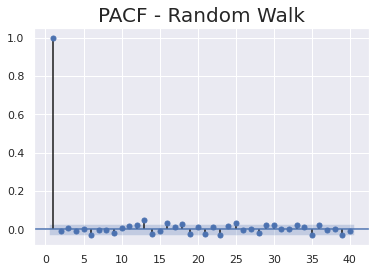

In [42]:
sgt.plot_pacf(df_training.random_walk, lags=40, alpha=0.05, zero=False, method=('ols'))
plt.title('PACF - Random Walk', size=20);